<a href="https://colab.research.google.com/github/rojaa004/Lead-Scoring-Case-Study/blob/main/NDVI_SMI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install rasterio

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 20.6/20.6 MB 55.1 MB/s eta 0:00:00


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
import rasterio.features
from rasterio.features import geometry_window
import rasterio.plot
import numpy as np
import matplotlib.pyplot as plt
import rasterio as rio
from rasterio.merge import merge
from rasterio.plot import show

In [4]:
#import Sentinel image band8 (NIR band)
#def reshape_as_image(arr: np.ndarray):
with rio.open('/content/drive/MyDrive/T43PGQ_20240318T050651_B08_10m.jp2') as src8:
    nir_band = src8.read(1).astype(float)
    #nir_band = reshape_as_image(src8.read());

In [5]:
#Import Sentinel image band4 (red band)
#def reshape_as_image(arr: np.ndarray):
with rio.open('/content/drive/MyDrive/T43PGQ_20240318T050651_B04_10m.jp2') as src4:
 red_band = src4.read(1).astype(float)
 #red_band = reshape_as_image(src4.read());

In [6]:
#Calculate NDVI
ndvi = (nir_band - red_band) / (nir_band + red_band)

<ipython-input-6-693611f1911d>:2: RuntimeWarning: invalid value encountered in divide
  ndvi = (nir_band - red_band) / (nir_band + red_band)


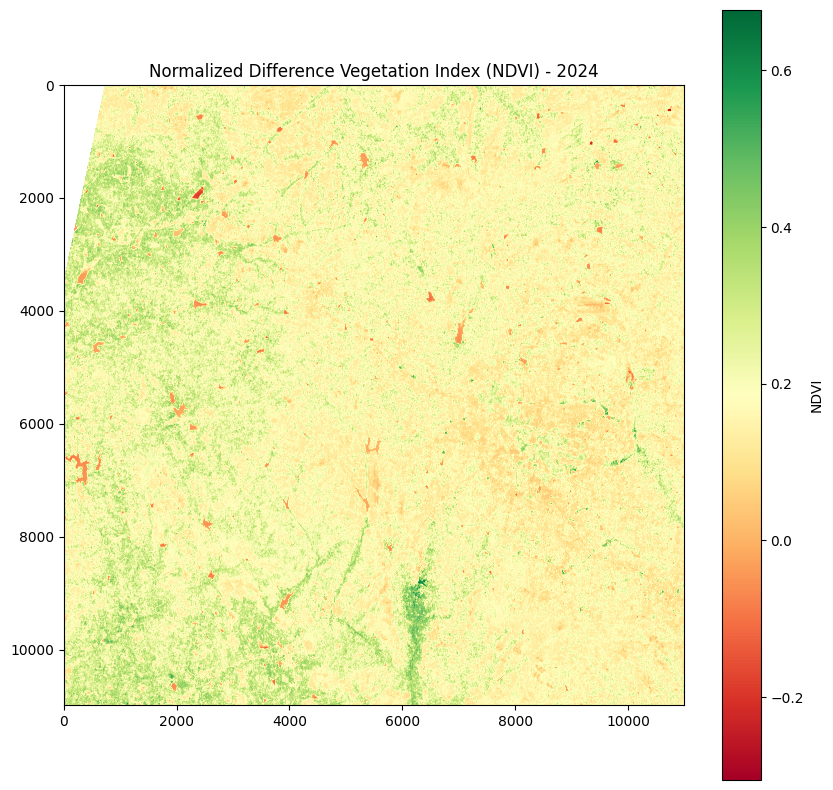

In [36]:
#Show NDVI
plt.figure(figsize=(10, 10))
plt.imshow(ndvi, cmap='RdYlGn')
plt.colorbar(label='NDVI')
plt.title('Normalized Difference Vegetation Index (NDVI) - 2024')
#plt.xlabel('Column #')
#plt.ylabel('Row #')
plt.show()

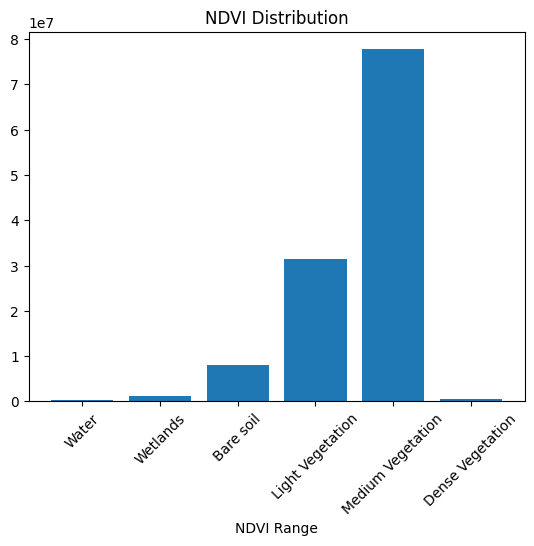

In [37]:
# Bar chart with values seperated based on the pixel value

import numpy as np

# Define the NDVI ranges and corresponding labels
ndvi_ranges = [(-0.1, -0.046), (-0.046, 0.025), (0.025, 0.090), (0.090, 0.140), (0.140, 0.500), (0.500, 1)]
labels = ['Water', 'Wetlands', 'Bare soil', 'Light Vegetation', 'Medium Vegetation', 'Dense Vegetation']

# Count the number of pixels in each NDVI range
counts = []
for i, ndvi_range in enumerate(ndvi_ranges):
  lower, upper = ndvi_range
  count = np.count_nonzero((ndvi >= lower) & (ndvi < upper))
  counts.append(count)
# Create a bar chart
plt.bar(labels, counts)
plt.xlabel('NDVI Range')
#plt.ylabel('Number of Pixels')
plt.title('NDVI Distribution')
plt.xticks(rotation=45)
plt.show()


Water percentage: 0.34
Wetlands percentage: 1.02
Bare soil percentage: 6.7
Light Vegetation percentage: 26.31
Medium Vegetation percentage: 65.15
Dense Vegetation percentage: 0.47


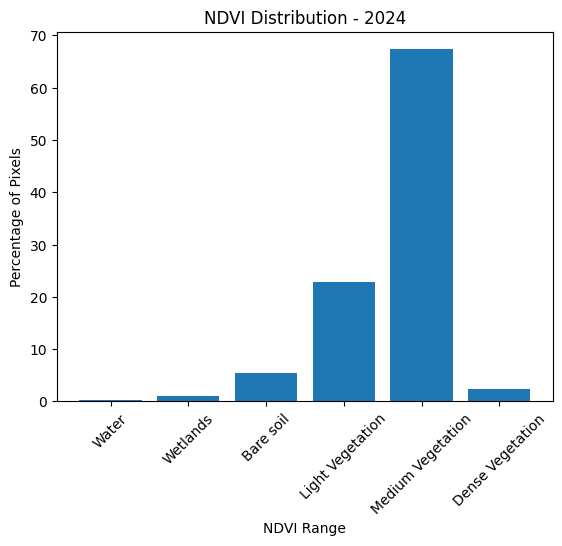

In [35]:
# Calculate the percentage of vegetation and water pixels
water = np.count_nonzero((ndvi < -0.046) & (ndvi >= -0.1))
Wetlands = np.count_nonzero((ndvi < 0.025) & (ndvi >= -0.046))
Bare_soil = np.count_nonzero((ndvi < 0.090) & (ndvi >= 0.025))
Light_Vegetation = np.count_nonzero((ndvi < 0.140) & (ndvi >= 0.090))
Medium_Vegetation = np.count_nonzero((ndvi < 0.500) & (ndvi >= 0.140))
Dense_Vegetation = np.count_nonzero((ndvi >= 0.500))
total_pixels = water + Wetlands + Bare_soil + Light_Vegetation + Medium_Vegetation + Dense_Vegetation

water_percentage = round(((water/total_pixels) * 100),2)
Wetlands_percentage = round(((Wetlands/total_pixels) * 100),2)
Bare_soil_percentage = round(((Bare_soil/total_pixels) * 100),2)
Light_Vegetation_percentage = round(((Light_Vegetation/total_pixels) * 100),2)
Medium_Vegetation_percentage = round(((Medium_Vegetation/total_pixels) * 100),2)
Dense_Vegetation_percentage = round(((Dense_Vegetation/total_pixels) * 100),2)

# Print the results
print("Water percentage:", water_percentage)
print("Wetlands percentage:", Wetlands_percentage)
print("Bare soil percentage:", Bare_soil_percentage)
print("Light Vegetation percentage:", Light_Vegetation_percentage)
print("Medium Vegetation percentage:", Medium_Vegetation_percentage)
print("Dense Vegetation percentage:", Dense_Vegetation_percentage)

# Calculate the percentage of pixels in each NDVI range
percentages = []
for count in counts:
  percentage = (count / total_pixels) * 100
  percentages.append(percentage)

# Create a bar chart with percentage values
plt.bar(labels, percentages)
plt.xlabel('NDVI Range')
plt.ylabel('Percentage of Pixels')
plt.title('NDVI Distribution - 2024')
plt.xticks(rotation=45)
plt.show()


In [18]:
# Calculate the percentage of vegetation and water pixels
vegetation_pixels = np.count_nonzero(ndvi > 0.2)
water_pixels = np.count_nonzero((ndvi <= 0.2) & (ndvi >= 0))
total_pixels = vegetation_pixels + water_pixels

vegetation_percentage = (vegetation_pixels / total_pixels) * 100
water_percentage = (water_pixels / total_pixels) * 100

# Print the results
print("Vegetation percentage:", vegetation_percentage)
print("Water percentage:", water_percentage)


Vegetation percentage: 37.62553497616489
Water percentage: 62.3744650238351


In [19]:
#import sentinel image Band8 (NIR band)
with rio.open('/content/drive/MyDrive/T43PGQ_20200329T050651_B08_10m.jp2') as src81:
  nir_band1 = src81.read(1).astype(float)

In [20]:
#import Sentinel image Band4 (red band)
with rio.open('/content/drive/MyDrive/T43PGQ_20200329T050651_B04_10m.jp2') as src41:
  red_band1 = src41.read(1).astype(float)

In [21]:
#Calculate NDVI
ndvi1 = (nir_band1 - red_band1) / (nir_band1+red_band1)

<ipython-input-21-e1db26a0c1f7>:2: RuntimeWarning: invalid value encountered in divide
  ndvi1 = (nir_band1 - red_band1) / (nir_band1+red_band1)


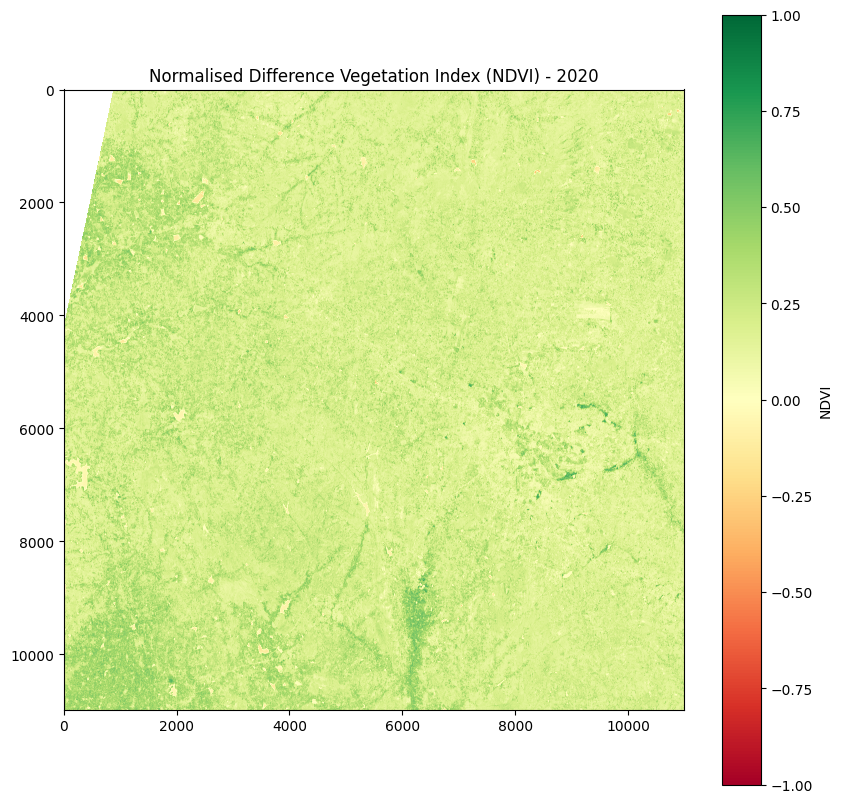

In [39]:
#Show NDVI
plt.figure(figsize=(10,10))
plt.imshow(ndvi1, cmap='RdYlGn')
plt.colorbar(label='NDVI')
plt.title('Normalised Difference Vegetation Index (NDVI) - 2020')
plt.show()

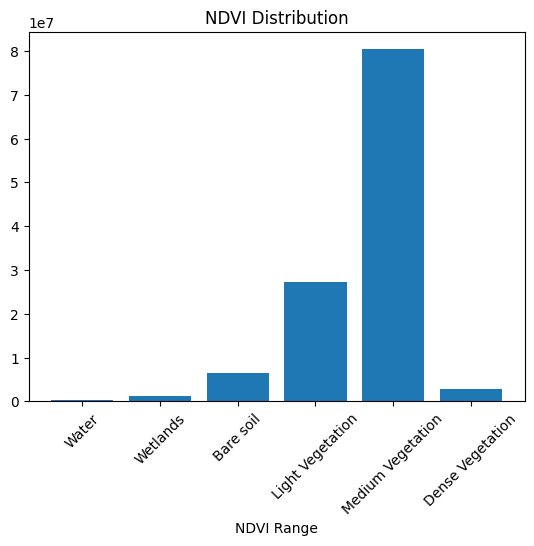

In [40]:
# Bar chart with values seperated based on the pixel value

import numpy as np

# Define the NDVI ranges and corresponding labels
ndvi1_ranges = [(-0.1, -0.046), (-0.046, 0.025), (0.025, 0.090), (0.090, 0.140), (0.140, 0.500), (0.500, 1)]
labels = ['Water', 'Wetlands', 'Bare soil', 'Light Vegetation', 'Medium Vegetation', 'Dense Vegetation']

# Count the number of pixels in each NDVI range
counts = []
for i, ndvi1_range in enumerate(ndvi1_ranges):
  lower, upper = ndvi1_range
  count = np.count_nonzero((ndvi1 >= lower) & (ndvi1 < upper))
  counts.append(count)
# Create a bar chart
plt.bar(labels, counts)
plt.xlabel('NDVI Range')
#plt.ylabel('Number of Pixels')
plt.title('NDVI Distribution')
plt.xticks(rotation=45)
plt.show()

Water percentage: 0.32
Wetlands percentage: 0.99
Bare soil percentage: 5.48
Light Vegetation percentage: 22.97
Medium Vegetation percentage: 67.75
Dense Vegetation percentage: 2.48


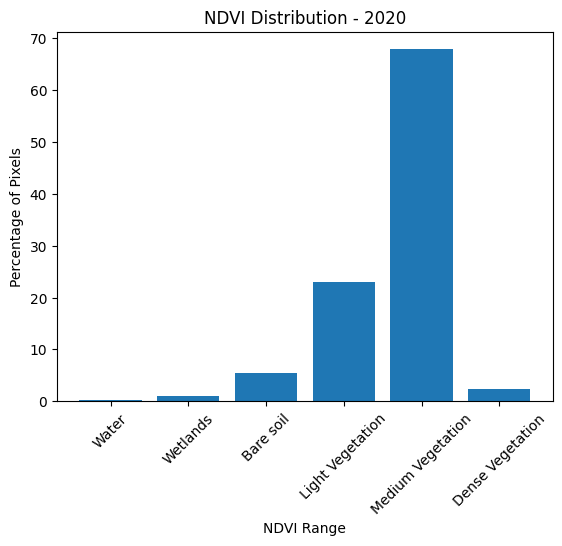

In [42]:
# Calculate the percentage of vegetation and water pixels
water = np.count_nonzero((ndvi1 < -0.046) & (ndvi1 >= -0.1))
Wetlands = np.count_nonzero((ndvi1 < 0.025) & (ndvi1 >= -0.046))
Bare_soil = np.count_nonzero((ndvi1 < 0.090) & (ndvi1 >= 0.025))
Light_Vegetation = np.count_nonzero((ndvi1 < 0.140) & (ndvi1 >= 0.090))
Medium_Vegetation = np.count_nonzero((ndvi1 < 0.500) & (ndvi1 >= 0.140))
Dense_Vegetation = np.count_nonzero((ndvi1 >= 0.500))
total_pixels = water + Wetlands + Bare_soil + Light_Vegetation + Medium_Vegetation + Dense_Vegetation

water_percentage = round(((water/total_pixels) * 100),2)
Wetlands_percentage = round(((Wetlands/total_pixels) * 100),2)
Bare_soil_percentage = round(((Bare_soil/total_pixels) * 100),2)
Light_Vegetation_percentage = round(((Light_Vegetation/total_pixels) * 100),2)
Medium_Vegetation_percentage = round(((Medium_Vegetation/total_pixels) * 100),2)
Dense_Vegetation_percentage = round(((Dense_Vegetation/total_pixels) * 100),2)

# Print the results
print("Water percentage:", water_percentage)
print("Wetlands percentage:", Wetlands_percentage)
print("Bare soil percentage:", Bare_soil_percentage)
print("Light Vegetation percentage:", Light_Vegetation_percentage)
print("Medium Vegetation percentage:", Medium_Vegetation_percentage)
print("Dense Vegetation percentage:", Dense_Vegetation_percentage)

# Calculate the percentage of pixels in each NDVI range
percentages = []
for count in counts:
  percentage = (count / total_pixels) * 100
  percentages.append(percentage)

# Create a bar chart with percentage values
plt.bar(labels, percentages)
plt.xlabel('NDVI Range')
plt.ylabel('Percentage of Pixels')
plt.title('NDVI Distribution - 2020')
plt.xticks(rotation=45)
plt.show()


In [24]:
# Calculate the percentage of vegetation and water pixels
vegetation_pixels = np.count_nonzero(ndvi1 > 0.2)
water_pixels = np.count_nonzero((ndvi1 <= 0.2) & (ndvi1 >= 0))
total_pixels = vegetation_pixels + water_pixels

vegetation_percentage = (vegetation_pixels / total_pixels) * 100
water_percentage = (water_pixels / total_pixels) * 100

# Print the results
print("Vegetation percentage:", vegetation_percentage)
print("Water percentage:", water_percentage)


Vegetation percentage: 43.55743687525699
Water percentage: 56.442563124743


<ipython-input-47-d1e9b992f447>:6: RuntimeWarning: invalid value encountered in divide
  smi = (nir8A_band - swir_band) / (nir8A_band + swir_band)


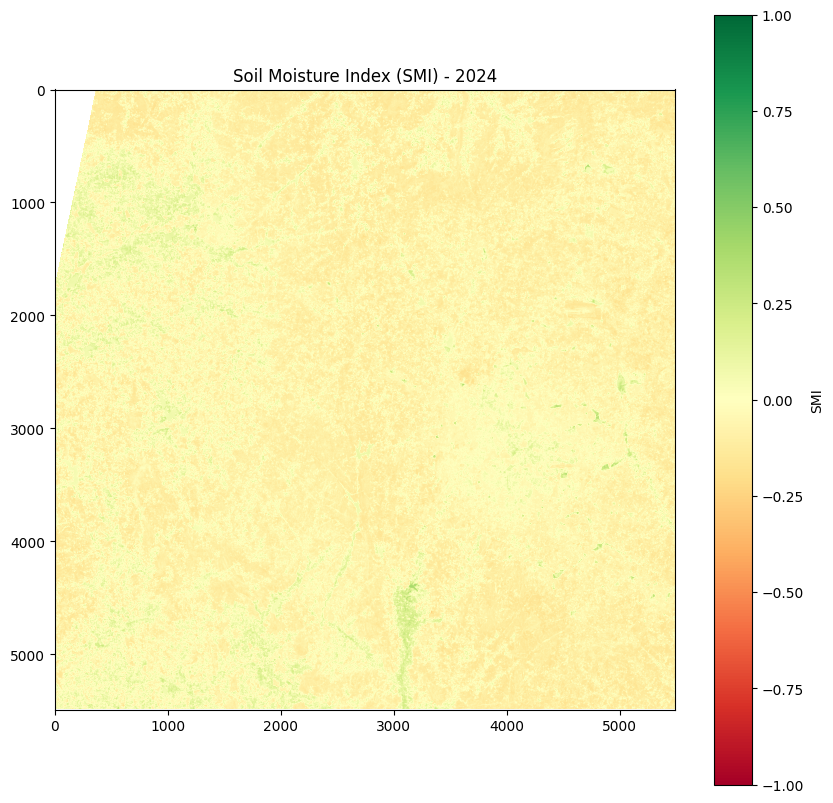

In [47]:
#soil moisture index
with rio.open('/content/drive/MyDrive/T43PGQ_20240318T050651_B8A_20m.jp2') as src8a:
    nir8A_band = src8a.read(1).astype(float)
with rio.open('/content/drive/MyDrive/T43PGQ_20240318T050651_B11_20m.jp2') as src11:
    swir_band = src11.read(1).astype(float)
smi = (nir8A_band - swir_band) / (nir8A_band + swir_band)
plt.figure(figsize=(10, 10))
plt.imshow(smi, cmap='RdYlGn')
plt.colorbar(label='SMI')
plt.title('Soil Moisture Index (SMI) - 2024')
plt.show()


In [46]:
# Calculate the percentage of soil moisture for each range
dry_pixels = np.count_nonzero(smi < -0.1)
moist_pixels = np.count_nonzero((smi >= -0.1) & (smi < 0.1))
wet_pixels = np.count_nonzero(smi >= 0.1)
total_pixels = dry_pixels + moist_pixels + wet_pixels

dry_percentage = round(((dry_pixels / total_pixels) * 100),2)
moist_percentage = round(((moist_pixels / total_pixels) * 100),2)
wet_percentage = round(((wet_pixels / total_pixels) * 100),2)

# Print the results
print("Dry percentage:", dry_percentage)
print("Moist percentage:", moist_percentage)
print("Wet percentage:", wet_percentage)


Dry percentage: 34.64
Moist percentage: 58.01
Wet percentage: 7.35


In [ ]:
with rio.open('/content/drive/MyDrive/T43PGQ_20240318T050651_B8A_20m.jp2') as src8a:
    nir8A_band = src8a.read(1).astype(float)
with rio.open('/content/drive/MyDrive/T43PGQ_20240318T050651_B11_20m.jp2') as src11:
    swir_band = src11.read(1).astype(float)
smi = (nir8A_band - swir_band) / (nir8A_band + swir_band)
plt.figure(figsize=(10, 10))
plt.imshow(smi, cmap='RdYlGn')
#plt.colorbar(label='SMI')
plt.title('Soil Moisture Index (SMI) - 2024')
plt.show()